In [5]:
import time
import numpy
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
from warnings import filterwarnings
filterwarnings("ignore")
from termcolor import colored
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import re
import nltk
#import tensorflow as tf
#from tensorflow.keras.utils import to_categorical 
from nltk.corpus import stopwords
from nltk.stem import *
#from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
import numpy as np

In [6]:
train_data=pd.read_csv("/Users/rakanalharbi/Desktop/project-nlp/data/Corona_NLP_train.csv",encoding="latin1")
test_data=pd.read_csv("/Users/rakanalharbi/Desktop/project-nlp/data/Corona_NLP_test.csv",encoding="latin1")

In [7]:
train_data.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [8]:
test_data.head()

UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
2  Find out how you can protect yourself and love...  Extremely Positive  
3  #Panic buying hits #NewYork City as anxious sh...            Negative  
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral

In [9]:
train_data.shape

(41157, 6)

In [10]:
train_data.drop_duplicates()
train_data.shape

(41157, 6)

In [11]:
train_data.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [12]:
print(train_data.Sentiment.unique())
print(train_data.Sentiment.value_counts())

['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64


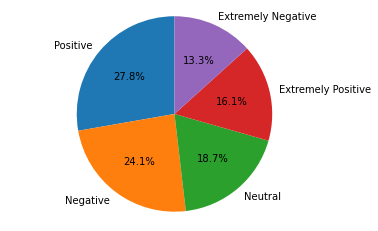

In [13]:
groups = (train_data.Sentiment.value_counts())
groups_cat = ['Positive','Negative','Neutral','Extremely Positive','Extremely Negative']
plt.pie(groups, labels = groups_cat,startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [14]:
location = train_data['Location'].value_counts().nlargest(n=15)

fig = px.bar(y=location.values,
       x=location.index,
       orientation='v',
       color=location.index,
       text=location.values,
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=1000, 
                  showlegend=False, 
                  xaxis_title="Location",
                  yaxis_title="Count",
                  title="Top 15 Locations with tweet count")
fig.show()

In [15]:
# India's Sentiment
def india_tweet(data):
    count_pos =0
    count_neg =0
    count_neu = 0
    for i in range(len(data)):
        if ((data['Sentiment'][i] == 'Positive' or data["Sentiment"][i] == "Extremely Positive") and data['Location'][i] == 'India'):
            count_pos = count_pos + 1
        elif ((data['Sentiment'][i] == 'Negative' or data["Sentiment"][i] == "Extremely Negative") and data['Location'][i] == 'India'):
            count_neg = count_neg + 1
        elif  ((data['Sentiment'][i] == 'Neutral') and data['Location'][i] == 'India'):
            count_neu = count_neu + 1
        else:
            0
    return [count_pos,count_neg,count_neu]

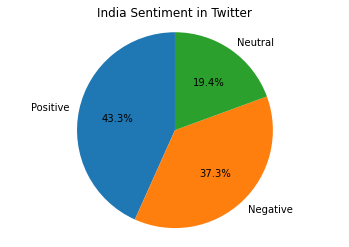

In [16]:
# India's Sentiment
df=india_tweet(train_data)
groups_cat_1 = ['Positive','Negative','Neutral']
plt.pie(df, labels = groups_cat_1,startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('India Sentiment in Twitter')
plt.show()

In [17]:
# Top Mentions in twitter
def mentions_finder(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
train_data['mentions'] = train_data['OriginalTweet'].apply(lambda x:mentions_finder(x))
allMentions = list(train_data[(train_data['mentions'] != None) & (train_data['mentions'] != "")]['mentions'])
allMentions = [tag.lower() for tag in allMentions]
mentions_df = dict(Counter(allMentions))
top_mentions_df = pd.DataFrame(list(mentions_df.items()),columns = ['word','count']).reset_index(drop=True).sort_values('count',ascending=False)[:20]
top_mentions_df.head()

fig = px.bar(x=top_mentions_df['word'],y=top_mentions_df['count'],
       orientation='v',
       color=top_mentions_df['word'],
       text=top_mentions_df['count'],
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=1000, 
                  showlegend=False, 
                  xaxis_title="People/Organizations",
                  yaxis_title="Count",
                  title="Top @mentions in Covid19 Tweets")
fig.show()

In [18]:
# Word Count for each sentiment
neg = train_data[train_data['Sentiment']=='Negative']['OriginalTweet'].str.split().map(lambda x: len(x))
pos = train_data[train_data['Sentiment']=='Positive']['OriginalTweet'].str.split().map(lambda x: len(x))
neu = train_data[train_data['Sentiment']=='Neutral']['OriginalTweet'].str.split().map(lambda x: len(x))
ex_pos = train_data[train_data['Sentiment']=='Extremely Positive']['OriginalTweet'].str.split().map(lambda x: len(x))
ex_neg = train_data[train_data['Sentiment']=='Extremely Negative']['OriginalTweet'].str.split().map(lambda x: len(x))


fig = make_subplots(rows=2, cols=3)

fig.add_trace(go.Histogram(x=list(neg), name='Negative Tweets'),row=1, col=1)

fig.add_trace(go.Histogram(x=list(pos), name='Positive Tweets'),row=1, col=2,)

fig.add_trace(go.Histogram(x=list(neu), name='Neutral Tweets'),row=1, col=3,)

fig.add_trace(go.Histogram(x=list(ex_neg), name='Extremely Negative Tweets'),row=2, col=1)

fig.add_trace(go.Histogram(x=list(ex_pos), name='Extremely Positive Tweets'),row=2, col=2)

fig.update_layout(title_text="Word Count")
fig.show()

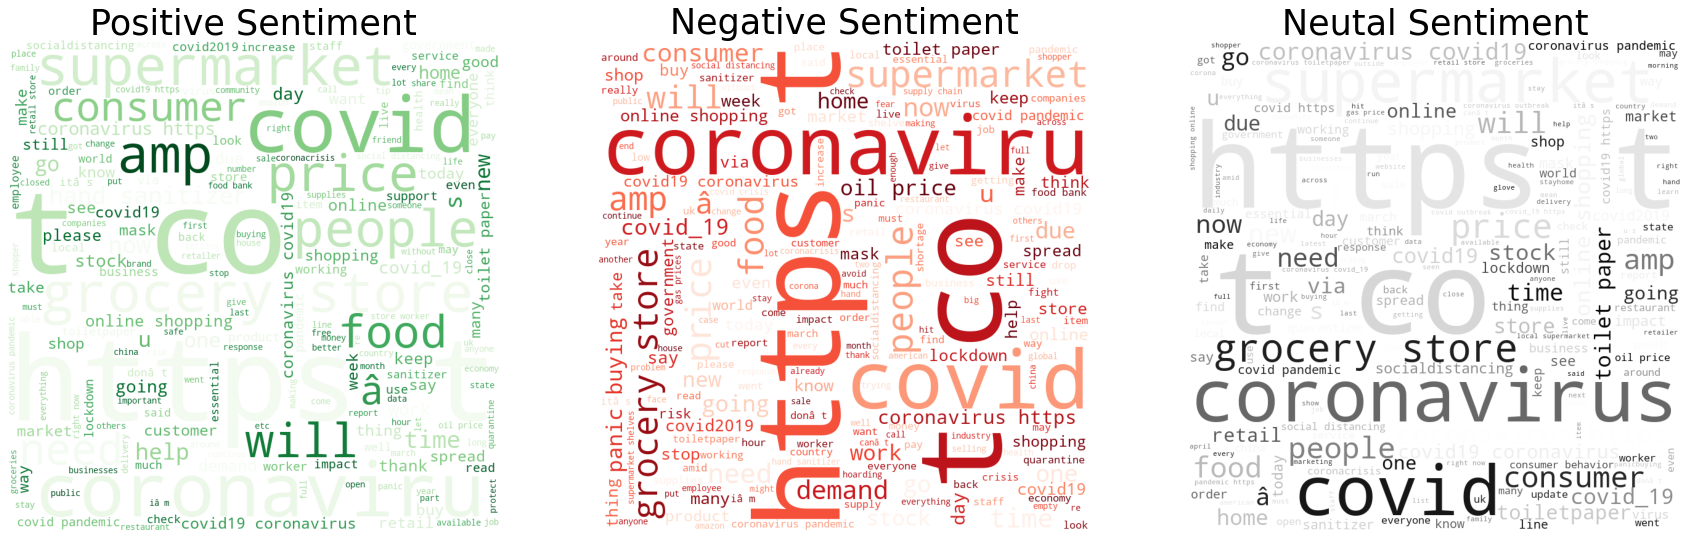

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])

df_pos = train_data[train_data['Sentiment']=="Positive"]
df_neg = train_data[train_data['Sentiment']=="Negative"]
df_neu = train_data[train_data['Sentiment']=="Neutral"]

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df_pos.OriginalTweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greens",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive Sentiment',fontsize=35);

comment_words = ''

for val in df_neg.OriginalTweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "




wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Reds",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)  
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative Sentiment',fontsize=35);



comment_words = ''
for val in df_neu.OriginalTweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud3 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greys",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutal Sentiment',fontsize=35);
# These are some commonly used words before cleaing data.

In [20]:
# Cleaning Data
train_data.drop(['UserName', 'ScreenName', 'Location', 'TweetAt','mentions'], axis=1, inplace=True)
test_data.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis=1, inplace=True)

In [21]:
train_data.head()

OriginalTweet           Sentiment
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral
1  advice Talk to your neighbours family to excha...            Positive
2  Coronavirus Australia: Woolworths to give elde...            Positive
3  My food stock is not the only one which is emp...            Positive
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [22]:
train_data.dtypes

OriginalTweet    object
Sentiment        object
dtype: object

In [19]:
train_data['Sentiment'] = train_data['Sentiment'].astype('category')
test_data['Sentiment'] = test_data['Sentiment'].astype('category')

In [20]:
train_data['Sentiment']= train_data['Sentiment'].cat.codes
test_data['Sentiment'] = test_data['Sentiment'].cat.codes

In [21]:
train_data.head()

OriginalTweet  Sentiment
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...          3
1  advice Talk to your neighbours family to excha...          4
2  Coronavirus Australia: Woolworths to give elde...          4
3  My food stock is not the only one which is emp...          4
4  Me, ready to go at supermarket during the #COV...          0

In [26]:
def original_tweet(data):
    processed = data.str.replace(r"#(\w+)", "") # replace #tag
    processed = processed.str.replace(r'https?://\S+', " ") # replace url
    processed = processed.str.replace(r"\r\r\n", "") # replace \r\n\r
    processed = processed.str.replace(".", "") # Replace dot
    processed = processed.str.replace(r'^\s+|\s+?$', '') # Remove lead and trail space
    processed = processed.str.replace(r'\s+', ' ') # Remove whitespace
    processed = processed.str.replace("'", "o")
    processed = processed.str.replace(r'[^\w\d\s]', '') # remove punctuation
    processed = processed.str.replace(r'[0-9]', '') #remove number
    return processed.str.lower()

In [27]:
clean_train = original_tweet(train_data["OriginalTweet"])
clean_test = original_tweet(test_data["OriginalTweet"])

In [28]:
print(colored("Before Cleaning\n","grey"))
print(colored(train_data['OriginalTweet'][3],"red"))
print("-----------------------------------------------------------------")
print(colored("After Cleaning\n","grey"))
print(colored(clean_train[3],"green"))

Before Cleaning






#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j
-----------------------------------------------------------------
After Cleaning

my food stock is not the only one which is emptyplease donot panic there will be enough food for everyone if you do not take more than you need stay calm stay safe


In [29]:
# Remove Stop Words
stopwords = set(STOPWORDS)  # stopwords

clean_train = clean_train.apply(lambda x:" ".join(term for term in x.split() if term not in stopwords)) # clean train
clean_test = clean_test.apply(lambda x:" ".join(term for term in x.split() if term not in stopwords)) # clean test

In [30]:
print(colored("Before Cleaning\n","grey"))
print(colored(train_data['OriginalTweet'][3],"red"))
print("-----------------------------------------------------------------\n")
print(colored("After Cleaning\n","grey"))
print(colored(clean_train[3],"green"))

Before Cleaning






#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j
-----------------------------------------------------------------

After Cleaning

food stock one emptyplease donot panic will enough food everyone take need stay calm stay safe


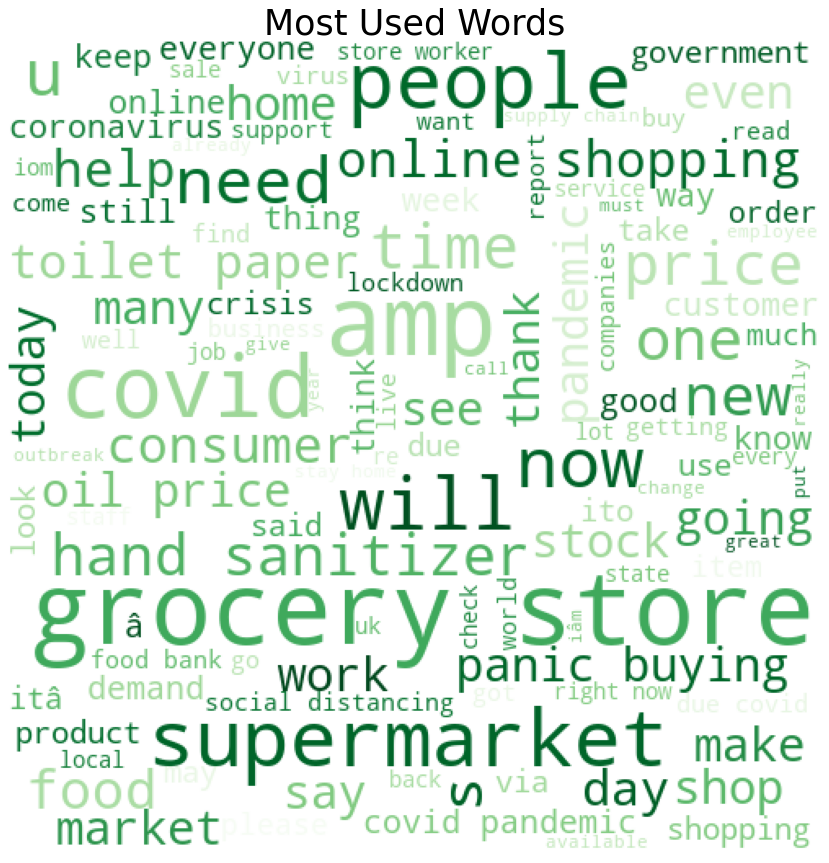

In [31]:
fig, (ax1) = plt.subplots(1, 1, figsize=[30, 15])

df_pos = clean_train

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df_pos: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
   

wordcloud1 = WordCloud(width = 500, height = 500, 
                background_color ='white',
                colormap="Greens",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Most Used Words',fontsize=35);
# The most common used words are online shopping, grocery, toilet papers, panic buying. This infer the demand of toilet papers in USA at the moment of lockdown period

In [32]:
wn = WordNetLemmatizer() # Using Lemmatization

clean_train = clean_train.apply(lambda x:" ".join([wn.lemmatize(word) for word in x.split()]))
clean_test = clean_test.apply(lambda x:" ".join([wn.lemmatize(word) for word in x.split()]))

In [33]:
print(colored("Before Cleaning","yellow"))
print(colored(train_data['OriginalTweet'][3],"red"))
print("-----------------------------------------------------------------")
print(colored("After Cleaning","yellow"))
print(colored(clean_train[3],"green"))

Before Cleaning





#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j
-----------------------------------------------------------------
After Cleaning
food stock one emptyplease donot panic will enough food everyone take need stay calm stay safe


In [30]:
vectorizer = CountVectorizer(stop_words='english')
doc_word = vectorizer.fit_transform(clean_train)
doc_word.shape

(41157, 50825)

In [31]:
pd.DataFrame(doc_word.toarray(), index=clean_train, columns=vectorizer.get_feature_names()).head(10)

__  ___  ____  _____  \
OriginalTweet                                                              
menyrbie phil_gahan chrisitv                         0    0     0      0   
advice talk neighbour family exchange phone num...   0    0     0      0   
coronavirus australia woolworth give elderly di...   0    0     0      0   
food stock one emptyplease donot panic will eno...   0    0     0      0   
ready go supermarket outbreaknot iom paranoid f...   0    0     0      0   
news regionâs first confirmed covid case came s...   0    0     0      0   
cashier grocery store sharing insight prove cre...   0    0     0      0   
supermarket today didnot buy toilet paper            0    0     0      0   
due covid retail store classroom atlanta will o...   0    0     0      0   
corona preventionwe stop buy thing cash use onl...   0    0     0      0   

                                                    ________  _________  \
OriginalTweet                                                             
menyrbie phil_gahan chrisitv                               0          0   
advice talk neighbour family exchange phone num...         0          0   
coronavirus australia woolworth give elderly di...         0          0   
food stock one emptyplease donot panic will eno...         0          0   
ready go supermarket outbreaknot iom paranoid f...         0          0   
news regionâs first confirmed covid case came s...         0          0   
cashier grocery store sharing insight prove cre...         0          0   
supermarket today didnot buy toilet paper                  0          0   
due covid retail store classroom atlanta will o...         0          0   
corona preventionwe stop buy thing cash use onl...         0          0   

                                                    __________  \
OriginalTweet                                                    
menyrbie phil_gahan chrisitv                                 0   
advice talk neighbour family exchange phone num...           0   
coronavirus australia woolworth give elderly di...           0   
food stock one emptyplease donot panic will eno...           0   
ready go supermarket outbreaknot iom paranoid f...           0   
news regionâs first confirmed covid case came s...           0   
cashier grocery store sharing insight prove cre...           0   
supermarket today didnot buy toilet paper                    0   
due covid retail store classroom atlanta will o...           0   
corona preventionwe stop buy thing cash use onl...           0   

                                                    _________________________________  \
OriginalTweet                                                                           
menyrbie phil_gahan chrisitv                                                        0   
advice talk neighbour family exchange phone num...                                  0   
coronavirus australia woolworth give elderly di...                                  0   
food stock one emptyplease donot panic will eno...                                  0   
ready go supermarket outbreaknot iom paranoid f...                                  0   
news regionâs first confirmed covid case came s...                                  0   
cashier grocery store sharing insight prove cre...                                  0   
supermarket today didnot buy toilet paper                                           0   
due covid retail store classroom atlanta will o...                                  0   
corona preventionwe stop buy thing cash use onl...                                  0   

                                                    ___katto  __cassidyrae__  \
OriginalTweet                                                                  
menyrbie phil_gahan chrisitv                               0               0   
advice talk neighbour family exchange phone num...         0               0   
coronavirus australia woolworth give elderly di...      

In [32]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(2)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.0110859 , 0.02137604])

In [33]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2"],
             columns = vectorizer.get_feature_names())
topic_word

__  ___  ____  _____  ________  _________  __________  \
component_1  0.0  0.0   0.0    0.0       0.0        0.0         0.0   
component_2  0.0  0.0  -0.0   -0.0      -0.0        0.0        -0.0   

             _________________________________  ___katto  __cassidyrae__  ...  \
component_1                                0.0       0.0             0.0  ...   
component_2                               -0.0       0.0            -0.0  ...   

              ãa  ãconomie  ãkma  ãlã²hun   ão  ãsteckãho  ãvã¼yor  \
component_1  0.0       0.0   0.0      0.0  0.0        0.0      0.0   
component_2 -0.0      -0.0  -0.0     -0.0  0.0       -0.0     -0.0   

             ã¼berweist  ã¼cretsiz  ã¼retime  
component_1         0.0        0.0       0.0  
component_2         0.0       -0.0      -0.0  

[2 rows x 50825 columns]

In [34]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [35]:
display_topics(lsa, vectorizer.get_feature_names(), 5)


Topic  0
covid, store, food, grocery, price

Topic  1
store, grocery, worker, employee, people


In [36]:
train_data.Sentiment.value_counts()

4    11422
2     9917
3     7713
1     6624
0     5481
Name: Sentiment, dtype: int64

In [348]:
# Split the data into training and test sets
X = train_data.OriginalTweet
y = train_data.Sentiment

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [349]:
print(f'X_train{X_train.value_counts}')
print(f'X_test{X_test.value_counts}')
print(f'y_train{y_train.value_counts}')
print(f'y_test{y_test.value_counts}')

X_train<bound method IndexOpsMixin.value_counts of 20468                                                                                                                            Look at the massive amount of CEOs which are all pedophiles have stepped down  
36278    In Praise of Preppers: Thanks to a community that has literally been waiting for this day to come, thereÂs now an online shopping industry to help you prepare for the COVID-19 apocalypse. https:/...
15665                                                                                                          best recipe for handmade sanitizer ... it really works! #Coronavirus .... https://t.co/bTaoQMBAn1
38348    Last week the amp took unprecedented action to try and stop related scam from bombarding American consumers demanding that gateway providers cut off robocallers in 48 hours or risk losing all acce...
32507    The rise in consumer prices eased to 2.5 percent year-on-year in March due mainly to the price freeze pu

In [63]:
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

train_data['OriginalTweet'] = train_data.OriginalTweet.map(alphanumeric).map(punc_lower)
train_data.head()
print(train_data.isna)

<bound method DataFrame.isna of                                            OriginalTweet Sentiment
0       menyrbie  phil gahan  chrisitv https   t co  ...      None
1      advice talk to your neighbours family to excha...      None
2      coronavirus australia  woolworths to give elde...      None
3      my food stock is not the only one which is emp...      None
4      me  ready to go at supermarket during the    o...      None
...                                                  ...       ...
41152  airline pilots offering to stock supermarket s...      None
41153  response to complaint not provided citing covi...      None
41154  you know itâs getting tough when  kameronwild...      None
41155  is it wrong that the smell of hand sanitizer i...      None
41156   tartiicat well new used rift s are going for ...      None

[41157 rows x 2 columns]>


In [50]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

aa  aaa  aaaaakubosan  aaaaas  aaaand  aaanews  aaannnddd  aaanortheast  \
0   0    0             0       0       0        0          0             0   
1   0    0             0       0       0        0          0             0   
2   0    0             0       0       0        0          0             0   
3   0    0             0       0       0        0          0             0   
4   0    0             0       0       0        0          0             0   

   aabutan  aacopd  ...  zzkxpxsnuh  zztubebesn  zzwmstfzip  zzwwitjwfa  zzz  \
0        0       0  ...           0           0           0           0    0   
1        0       0  ...           0           0           0           0    0   
2        0       0  ...           0           0           0           0    0   
3        0       0  ...           0           0           0           0    0   
4        0       0  ...           0           0           0           0    0   

   zzzz  zã¼rich  ã¼berweist  ã¼cretsiz  ã¼retime  
0     0        0           0          0         0  
1     0        0           0          0         0  
2     0        0           0          0         0  
3     0        0           0          0         0  
4     0        0           0          0         0  

[5 rows x 44746 columns]

In [51]:
# The second document-term matrix has both unigrams and bigrams, and indicators instead of counts
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names()).head()

aa  aa bakers  aa cristobal  aaa  aaa arizona  aaa gas  aaa ncnu  aaa says  \
0   0          0             0    0            0        0         0         0   
1   0          0             0    0            0        0         0         0   
2   0          0             0    0            0        0         0         0   
3   0          0             0    0            0        0         0         0   
4   0          0             0    0            0        0         0         0   

   aaa texas  aaaaakubosan  ...  zzzz  zzzz antalya  zã¼rich  \
0          0             0  ...     0             0        0   
1          0             0  ...     0             0        0   
2          0             0  ...     0             0        0   
3          0             0  ...     0             0        0   
4          0             0  ...     0             0        0   

   zã¼rich distance  ã¼berweist  ã¼berweist den  ã¼cretsiz  \
0                 0           0               0          0   
1                 0           0               0          0   
2                 0           0               0          0   
3                 0           0               0          0   
4                 0           0               0          0   

   ã¼cretsiz veriyorlar  ã¼retime  ã¼retime geã  
0                     0         0             0  
1                     0         0             0  
2                     0         0             0  
3                     0         0             0  
4                     0         0             0  

[5 rows x 346534 columns]

In [37]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

data = test_data[["OriginalTweet", "Sentiment"]]
x = np.array(test_data["OriginalTweet"])
y = np.array(test_data["Sentiment"])
cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = MultinomialNB()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


                    precision    recall  f1-score   support

Extremely Negative       0.55      0.11      0.18       203
Extremely Positive       0.60      0.14      0.23       212
          Negative       0.33      0.69      0.44       329
           Neutral       0.62      0.11      0.19       211
          Positive       0.31      0.46      0.37       299

          accuracy                           0.35      1254
         macro avg       0.48      0.30      0.28      1254
      weighted avg       0.45      0.35      0.31      1254



In [36]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [118]:
# Train the first model
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr.fit(X_train, y_train)
y_pred_cv1 = lr.predict(X_test)
print(metrics.classification_report(y_test,y_pred_cv1))

              precision    recall  f1-score   support

           0       0.49      0.40      0.44       184
           1       0.56      0.38      0.45       192
           2       0.38      0.45      0.41       299
           3       0.52      0.51      0.52       193
           4       0.34      0.39      0.37       272

    accuracy                           0.43      1140
   macro avg       0.46      0.43      0.44      1140
weighted avg       0.44      0.43      0.43      1140



In [115]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [116]:
accurcy = metrics.accuracy_score(y_test,y_pred)
accurcy

0.42719298245614035

In [141]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 300)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.38333333333333336


In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(test_data['OriginalTweet'])
tfidf_vectorizer_vectors

<3798x13926 sparse matrix of type '<class 'numpy.float64'>'
	with 113125 stored elements in Compressed Sparse Row format>

In [170]:
from sklearn.feature_extraction.text import CountVectorizer 
#instantiate CountVectorizer() 
cv=CountVectorizer() 
 
# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(test_data)

In [176]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [177]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

idf_weights
originaltweet     1.405465
sentiment         1.405465

In [261]:
# create the transform
vectorizer = TfidfVectorizer()

# tokenize and build vocab
vectorizer.fit(test_data['OriginalTweet'])

# summarize
vectorizer.vocabulary_
#print(vectorizer.idf_)

{'trending': 12506,
 'new': 8297,
 'yorkers': 13777,
 'encounter': 4344,
 'empty': 4327,
 'supermarket': 11822,
 'shelves': 10989,
 'pictured': 9259,
 'wegmans': 13308,
 'in': 6257,
 'brooklyn': 2003,
 'sold': 11311,
 'out': 8827,
 'online': 8704,
 'grocers': 5533,
 'foodkick': 4995,
 'maxdelivery': 7702,
 'as': 1247,
 'coronavirus': 3051,
 'fearing': 4762,
 'shoppers': 11051,
 'stock': 11616,
 'up': 12851,
 'https': 6034,
 'co': 2675,
 'gr76pcrlwh': 5472,
 'ivmkmsqdt1': 6581,
 'when': 13372,
 'couldn': 3151,
 'find': 4850,
 'hand': 5664,
 'sanitizer': 10683,
 'at': 1312,
 'fred': 5101,
 'meyer': 7831,
 'turned': 12607,
 'to': 12327,
 'amazon': 1021,
 'but': 2098,
 '114': 77,
 '97': 625,
 'for': 5018,
 'pack': 8922,
 'of': 8614,
 'purell': 9772,
 'check': 2466,
 'how': 6002,
 'concerns': 2835,
 'are': 1207,
 'driving': 4026,
 'prices': 9587,
 'ygbipbflmy': 13747,
 'you': 13780,
 'can': 2201,
 'protect': 9692,
 'yourself': 13788,
 'and': 1074,
 'loved': 7437,
 'ones': 8698,
 'from': 514

In [267]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(test_data['OriginalTweet'])
word = vectorizer.get_feature_names()
print (word)
print (X.toarray())

['00', '000', '000x', '0095', '01', '0155pm02av', '0202628233', '0202779000', '03', '038', '04', '04gleashyy', '0558234767', '05cjs38mts', '06', '07', '0722', '0723212218', '0724', '0751670284', '0800', '0808', '084', '09', '09093052802', '093bd1db0c0d3a62af15883138a5f57d4cef35ae14e31e602b74489dd2524c7f', '0asmxipn8n', '0btxjemv1i', '0c9migk7zs', '0calamity', '0d8r1mcotx', '0dzaqkfbne', '0fydbr70zd', '0gazxnjree', '0gyrjqkcde', '0hcxgypoyf', '0hwzbckncs', '0krzdjq0eo', '0mlsbiuzkl', '0nygaztp9j', '0o6elzx24f', '0qsxmvimim', '0qtzjrz72n', '0rhlgzbaxh', '0rucplqldy', '0s5y4wvjoo', '0snh8w0h4f', '0t2dpvxbhv', '0u8qd7fnqr', '0um3lubexo', '0v48kt4vqk', '0vrddfnpay', '0wqranoqxl', '0wx0ojpbrk', '0xmtzeo7eq', '0yjjuzkxqi', '0ypkb68ijq', '10', '100', '1000', '100029', '1000s', '1000x', '100s', '100â', '1028pm', '10am', '10k', '10p', '10pm', '10tv', '10x', '10â', '11', '110', '111', '113uryzol8', '114', '116', '118', '11am', '11cmhoktyz', '11pm', '12', '120', '1200', '1220', '12am', '12emup9mta

In [289]:
from sklearn.feature_extraction.text import TfidfTransformer 
transformer = TfidfTransformer() 
print (transformer)
tfidf = transformer.fit_transform(X)
#print (tfidf.toarray())
pd.DataFrame(tfidf)

TfidfTransformer()


0
0       (0, 13777)\t0.25051712300925083\n  (0, 13308)\t0.23267219050503674\n  (0, 12851)\t0.08670080168399344\n  (0, 12506)\t0.24340155962129975\n  (0, 11822)\t0.09598380434564402\n  (0, 11616)\t0.08349...
1       (0, 13747)\t0.2902143113290932\n  (0, 13372)\t0.13143318474687166\n  (0, 12851)\t0.09229625819927707\n  (0, 12607)\t0.25911009767585197\n  (0, 12327)\t0.051396554030166054\n  (0, 10683)\t0.16253...
2       (0, 13788)\t0.3971696503994112\n  (0, 13780)\t0.16495675870668974\n  (0, 9692)\t0.3604723514591285\n  (0, 8827)\t0.19606662373065126\n  (0, 8698)\t0.3908581593979832\n  (0, 7437)\t0.469860247421...
3       (0, 13531)\t0.1678986477432103\n  (0, 12851)\t0.06986132037151088\n  (0, 11839)\t0.10772733229789719\n  (0, 11616)\t0.06727895722853548\n  (0, 11508)\t0.21967038941474645\n  (0, 11051)\t0.142696...
4       (0, 13301)\t0.1535028469393918\n  (0, 12851)\t0.08901637548610256\n  (0, 12343)\t0.17386848017793066\n  (0, 12342)\t0.11166161173018405\n  (0, 12169)\t0.047666759068189214\n  (0, 10808)\t0.27990...
...                                                                                                                                                                                                       ...
3793    (0, 13089)\t0.4061216934663989\n  (0, 12336)\t0.26751810967710515\n  (0, 12327)\t0.0719235914503153\n  (0, 11822)\t0.14298691762097848\n  (0, 11561)\t0.2060319557690493\n  (0, 11153)\t0.38686078...
3794    (0, 13780)\t0.08279493029611028\n  (0, 13426)\t0.09974174345739788\n  (0, 13114)\t0.48320530551129964\n  (0, 12583)\t0.2706052296444236\n  (0, 12327)\t0.095847625450102\n  (0, 12221)\t0.10394784...
3795    (0, 13253)\t0.19851951469952558\n  (0, 13233)\t0.12671517560037912\n  (0, 12169)\t0.04860425012498192\n  (0, 12005)\t0.215987308792728\n  (0, 11538)\t0.19284770978871663\n  (0, 10275)\t0.2391269...
3796    (0, 13560)\t0.18116171376921938\n  (0, 13059)\t0.12272770431796896\n  (0, 12585)\t0.24793876344087637\n  (0, 12327)\t0.04390961284094363\n  (0, 12120)\t0.24793876344087637\n  (0, 11822)\t0.08729...
3797    (0, 13686)\t0.25647805489396164\n  (0, 13272)\t0.08886211413037225\n  (0, 12900)\t0.2356838279209938\n  (0, 12327)\t0.0908438191455097\n  (0, 12309)\t0.19603151206329245\n  (0, 12169)\t0.0436778...

[3798 rows x 1 columns]

In [340]:
cv = CountVectorizer(stop_words="english")
X = cv.fit_transform(test_data).toarray()
dt = pd.DataFrame(X, columns=cv.get_feature_names())
dt

location  originaltweet  screenname  sentiment  tweetat  username
0         0              0           0          0        0         1
1         0              0           1          0        0         0
2         1              0           0          0        0         0
3         0              0           0          0        1         0
4         0              1           0          0        0         0
5         0              0           0          1        0         0